<a href="https://colab.research.google.com/github/Syeda-Fatima24/Syeda-Fatima24/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.columns


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,True,False,False
4859,794,22,4,114440.24,1,1,1,107753.07,False,True,False
3264,738,35,5,161274.05,2,1,0,181429.87,False,False,True
9845,590,38,9,0.00,2,1,1,148750.16,False,True,False


In [ ]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9394,597,35,8,131101.04,1,1,1,192852.67,True,False,False
898,523,40,2,102967.41,1,1,0,128702.10,False,False,False
2398,706,42,8,95386.82,1,1,1,75732.25,False,True,False
5906,788,32,4,112079.58,1,0,0,89368.59,False,False,True
2343,706,38,5,163034.82,2,1,1,135662.17,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,False,False,False
2899,586,35,7,0.00,2,1,0,70760.69,False,False,False
9549,578,36,1,157267.95,2,1,0,141533.19,False,True,True
2740,650,34,4,142393.11,1,1,1,11276.48,True,False,True


In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled,y_train,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 2s 4ms/step - loss: 0.5315 - accuracy: 0.7959 - val_loss: 0.4920 - val_accuracy: 0.7969
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.7958 - val_loss: 0.4767 - val_accuracy: 0.7969
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.7958 - val_loss: 0.4588 - val_accuracy: 0.7969
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.7959 - val_loss: 0.4424 - val_accuracy: 0.7981
Epoch 5/10
200/200 [==============================] - 1s 2ms/step - loss: 0.4336 - accuracy: 0.8045 - val_loss: 0.4344 - val_accuracy: 0.8106
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4269 - accuracy: 0.8130 - val_loss: 0.4311 - val_accuracy: 0.8094
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8111 - val_loss: 0.4294 - val_accuracy: 0.8106
Epoch 

In [ ]:
model.layers[0].get_weights()

[array([[-1.00028850e-01, -4.27273177e-02,  2.96852678e-01,
          2.16931358e-01, -1.56124115e-01, -6.47992790e-02,
          2.17767786e-02,  7.72815794e-02,  3.91911380e-02,
         -5.71298674e-02, -1.22084461e-01],
        [ 1.75282025e+00, -2.43977934e-01, -1.03082263e+00,
         -1.35150361e+00,  1.75940788e+00, -1.13478169e-01,
         -9.51105177e-01, -2.29592726e-01,  1.96160793e-01,
          1.66649115e+00, -1.12620699e+00],
        [ 1.83601379e-01,  1.18161023e-01,  2.27252215e-01,
         -2.48444334e-01, -1.84308484e-01,  4.24414068e-01,
          1.60046265e-01,  8.99223238e-03, -3.60911265e-02,
          6.85343519e-02,  1.82519138e-01],
        [-9.08258632e-02, -5.41885674e-01, -4.39872563e-01,
         -2.27284595e-01, -2.08007425e-01, -7.05875009e-02,
         -1.82072103e-01,  1.34733722e-01, -1.39644757e-01,
          3.87135558e-02, -3.22676837e-01],
        [-8.96338969e-02, -1.07354753e-01,  2.26685163e-02,
          2.67370224e-01,  5.54562919e-02, -

In [ ]:
model.layers[1].get_weights()

[array([[-0.33040377, -0.70832026, -0.24977165, -1.0210806 ,  0.51556087,
         -0.7558334 ,  0.6180039 , -0.17919743, -0.84333   ,  0.22340778,
          0.78603995],
        [ 0.3887278 ,  0.00220135, -0.3377939 ,  0.5033621 , -0.2435674 ,
          0.45399272, -0.65463734,  0.31014246,  0.24427909, -0.4335745 ,
          0.16566193],
        [ 0.3598292 ,  0.15497869,  0.5294297 ,  0.63510126, -0.49435768,
          0.80490524, -0.1486259 ,  0.7305647 ,  0.8388404 , -0.68664116,
         -0.67596257],
        [ 0.87130696,  0.33033895,  0.13179639,  1.0656344 , -0.4771402 ,
          0.27528855,  0.06809678,  0.2098358 ,  0.21139489, -0.18637909,
         -0.25758243],
        [-0.16591015, -0.57347065, -0.6145596 , -0.50045496,  0.48436466,
         -0.2647153 ,  0.14401226, -0.72385275, -0.47380555, -0.16727276,
          0.0378267 ],
        [-0.13381259,  0.68073153,  0.5822494 , -0.14363217, -0.5901232 ,
          0.3145327 , -0.13829052,  0.77799386, -0.12590879, -0.4627120

In [ ]:
model.layers[2].get_weights()

[array([[-0.43953294],
        [-0.6148345 ],
        [-0.37061387],
        [-0.29083425],
        [ 0.8579221 ],
        [-0.8563756 ],
        [ 0.42227265],
        [-0.46960017],
        [-0.49158522],
        [ 0.6821008 ],
        [ 0.421914  ]], dtype=float32),
 array([-0.0885413], dtype=float32)]

In [ ]:
ylog= model.predict(X_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [ ]:
y_pred= np.where(ylog > 0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.825

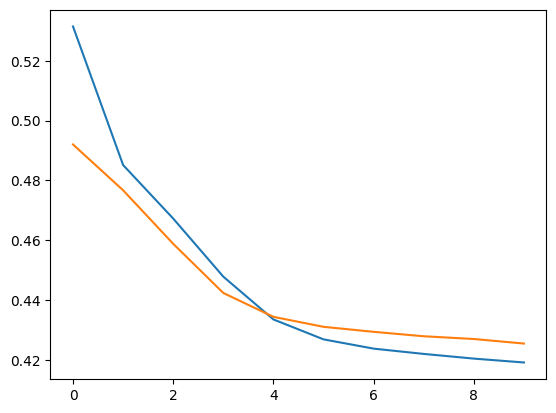

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

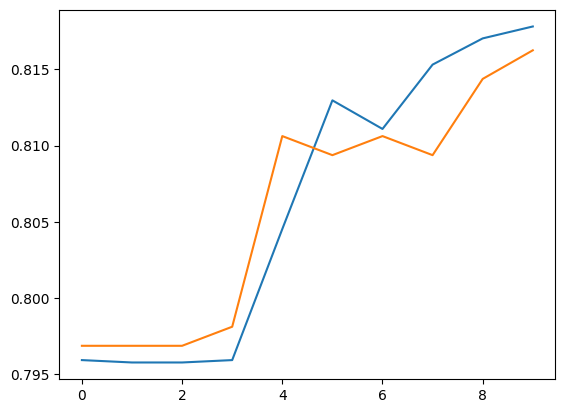

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])